## Load parameters and calculate quiescent luminosity, assign spectral class and  if not already

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
import specmatchemp.library
import specmatchemp.plots as smplot
import glob
warnings.filterwarnings("ignore")

from f_6_7_8 import merged_spec_class, Mbol_to_Lum, kepler_luminosity, L_quieterr

cluster_dict = {'M67':['M67','M67', 15, 4.0, 908.],
                'M44':['M44','M44', 47, 0.73, 160.],
                'Pleiades':['Pleiades','Pleiades',0.,0.100,135.]
               }
DM = lambda x: 5.*np.log10(float(x))-5. 

#------------------------------------------------
cluster = 'M67'
test = 'run_06'
l = 'stars_shortlist/{0}/results/{1}/catalog/{0}_parameter.csv'.format(cluster, test)
lback = 'stars_shortlist/{0}/results/{1}/catalog/{0}_parameter_backup.csv'.format(cluster, test)
#------------------------------------------------

/usr/lib64/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)


In [2]:
basics = cluster_dict[cluster]
dm = DM(basics[4])
global dm

print(glob.glob(l))

# if glob.glob(l) != []:
#     specs = pd.read_csv(lback, index_col='EPIC')
   
specs = pd.read_csv(l, index_col='EPIC')
specs['DM'] = DM(cluster_dict[cluster][4])
# if 'L_quiet_bol_err' not in specs.columns.values:
wavmin, wavmax = 3480., 9700.
lib = specmatchemp.library.read_hdf(wavlim=[wavmin,wavmax])
#print(lib.library_params.columns.values)
#specs = specs.iloc[:5]
specs = merged_spec_class(specs)

L_quiet, Lplanck, L_quiet_bol, L_quiet_logL, L_quiet_err, L_quiet_bol_err = [],[],[],[], [],[]
todrop1, whydrop1 = [], [] 


i=0
for oid in specs.index.values:
    print(i,oid)
    i+=1
    Lqb, LqlogL = Mbol_to_Lum(specs.Mbol[oid], specs.logL[oid] )
    L_quiet_bol.append(Lqb)
    L_quiet_logL.append(LqlogL)
    L_quiet_bol_err.append(Mbol_to_Lum(specs.Mbol[oid],specs.logL[oid], specs.Mbol_err[oid],err=True,))
    print(specs['T'][oid])
    Lq, Lp = kepler_luminosity(cluster,specs['T'][oid],specs.R_Rsun_Jackson[oid],lib)
    
    if str(Lq) == 'nan':
        todrop1.append(True)
        whydrop1.append('noLum')
        L_quiet_err.append(np.nan)
    else:
        todrop1.append(False)
        whydrop1.append(None)
        L_quiet_err.append(L_quieterr(cluster,Lq,
                                    specs.R_Rsun_Jackson[oid],
                                    specs.R_Rsun_err[oid],
                                    specs['T'][oid],
                                    specs['T_err'][oid],
                                    lib,))
    L_quiet.append(Lq)
    Lplanck.append(Lp)
specs['L_quiet_logL'] = L_quiet_logL
specs['L_quiet'] = L_quiet
specs['L_planck'] = Lplanck
specs['L_quiet_bol'] = L_quiet_bol
specs['L_quiet_err'] = L_quiet_err
specs['L_quiet_bol_err'] = L_quiet_bol_err
specs['todrop1'] = todrop1
specs['whydrop1'] = whydrop1

['stars_shortlist/M67/results/run_06/catalog/M67_parameter.csv']
Reading library from /home/eilin/.specmatchemp/library.h5
0 211389428
3940
1 211389537
5170
2 211389716
6170
3 211389931
4230
4 211390071
3800
5 211390107
5720
6 211390158
6510
7 211390800
6040
8 211391125
5280
9 211391208
3700
10 211391297
4070
11 211391564
3500
12 211391621
4830
13 211392113
5920
14 211392234
5920
15 211392354
6170
16 211392455
3700
17 211392789
5490
18 211392837
4620
19 211392859
3650
20 211392899
4410
21 211393067
4070
22 211393129
5920
23 211393422
3870
24 211394056
5920
25 211394185
4830
26 211394279
4070
27 211394397
5920
28 211394534
5040
29 211394537
5880
30 211394542
4070
31 211394607
6170
32 211394644
5660
33 211394919
3940
34 211395037
5490
35 211395187
3800
36 211395281
3940
37 211395492
3550
38 211395555
5040
39 211395606
4410
40 211395620
4830
41 211395699
5680
42 211395891
3870
43 211395912
4070
44 211395971
5920
45 211395992
3870
46 211396025
5920
47 211396155
5490
48 211396156
5040
49 21

In [19]:
c = specs[(specs['T']>3750) & (specs['T']<4000)].L_quiet_bol.mean()
1.37*10**33/(0.165*365*24*3600*c)/25

4.0991951374686905e-08

In [20]:
c = specs[(specs['T']>3500) & (specs['T']<3750)].L_quiet_bol.mean()
1.30*10**33/(0.165*365*24*3600*c)/16

1.175653698827693e-07

In [ ]:
from astropy.constants import h,c,sigma_sb,k_B
print(h,c,k_B)
print(h.to('erg*s'))
print(c.to('cm/s'))
print(sigma_sb.to('erg/s/K**4/cm**2'))
from scipy.constants import pi
sigma_sb

## All sorts of sanity checks

In [28]:

specs[['g_r','J-H','H-K','r_i','i_z','z_J','J_H','H_K','R_Rsun','R_Rsun_err','Msun',
       'T','T_err','L_quiet','L_planck','L_quiet_bol','L_quiet_logL','L_quiet_err','L_quiet_bol_err','todrop1','whydrop1']].sort_values('T').head(20)

,g_r,J-H,H-K,r_i,i_z,z_J,J_H,H_K,R_Rsun,R_Rsun_err,...,T,T_err,L_quiet,L_planck,L_quiet_bol,L_quiet_logL,L_quiet_err,L_quiet_bol_err,todrop1,whydrop1
EPIC,,,,,,,,,,,,,,,,,,,,,
211012996.0,1.72,0.605,0.352,2.12,1.24,2.31,0.66,0.32,0.127,0.0254,...,2850,145.028733,NaN,NaN,3.926992e+30,3.819970e+30,NaN,3.119570e+30,True,noLum
211000887.0,1.72,0.605,0.352,2.12,1.24,2.31,0.66,0.32,0.127,0.0254,...,2850,145.028733,NaN,NaN,3.926992e+30,3.819970e+30,NaN,3.119570e+30,True,noLum
211080124.0,1.72,0.605,0.352,2.12,1.24,2.31,0.66,0.32,0.127,0.0254,...,2850,145.028733,NaN,NaN,3.926992e+30,3.819970e+30,NaN,3.119570e+30,True,noLum
211057696.0,1.72,0.605,0.352,2.12,1.24,2.31,0.66,0.32,0.127,0.0254,...,2850,145.028733,NaN,NaN,3.926992e+30,3.819970e+30,NaN,3.119570e+30,True,noLum
211038095.0,1.72,0.605,0.352,2.12,1.24,2.31,0.66,0.32,0.127,0.0254,...,2850,145.028733,NaN,NaN,3.926992e+30,3.819970e+30,NaN,3.119570e+30,True,noLum
211094556.0,NaN,0.588,0.329,NaN,NaN,NaN,NaN,NaN,0.149,0.0298,...,3000,96.436508,1.485346e+29,6.213253e+30,6.517184e+30,6.487240e+30,6.320959e+28,5.177198e+30,False,None
211102810.0,NaN,0.588,0.329,NaN,NaN,NaN,NaN,NaN,0.149,0.0298,...,3000,96.436508,1.485346e+29,6.213253e+30,6.517184e+30,6.487240e+30,6.320959e+28,5.177198e+30,False,None
211047412.0,NaN,0.588,0.329,NaN,NaN,NaN,NaN,NaN,0.149,0.0298,...,3000,96.436508,1.485346e+29,6.213253e+30,6.517184e+30,6.487240e+30,6.320959e+28,5.177198e+30,False,None
210994964.0,NaN,0.588,0.329,NaN,NaN,NaN,NaN,NaN,0.149,0.0298,...,3000,96.436508,1.485346e+29,6.213253e+30,6.517184e+30,6.487240e+30,6.320959e+28,5.177198e+30,False,None


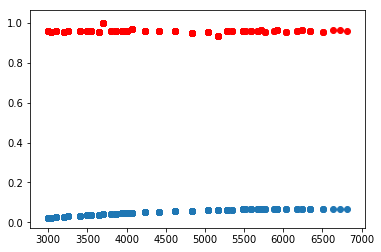

In [29]:
import matplotlib.pyplot as plt
specs2 = specs.sort_values('T')
plt.scatter(specs2['T'],specs2.L_planck/specs2.L_quiet_logL,color='R')
plt.scatter(specs2['T'],specs2.L_quiet/specs2.L_quiet_logL)

In [30]:
pd.DataFrame({'color counts' : specs[['g_r','J-H','H-K','r_i','i_z','z_J','J_H','H_K','z-Y']].count()})

,color counts
g_r,492
J-H,826
H-K,826
r_i,492
i_z,492
z_J,492
J_H,492
H_K,492
z-Y,62


In [31]:
pd.DataFrame({'band counts' : specs[['SDSS_g','SDSS_r','H','K','J','SDSS_i','SDSS_z','SDSS_y']].count()})

,band counts
SDSS_g,789
SDSS_r,788
H,822
K,820
J,822
SDSS_i,789
SDSS_z,783
SDSS_y,784


In [32]:
r = specs2.L_quiet_err/specs2.L_quiet
r.head(15)

EPIC
211012996.0         NaN
211000887.0         NaN
211080124.0         NaN
211057696.0         NaN
211038095.0         NaN
211094556.0    0.425555
211102810.0    0.425555
211047412.0    0.425555
210994964.0    0.425555
210957162.0    0.425555
210945565.0    0.425555
211055772.0    0.425555
211056628.0    0.425555
211129571.0    0.425555
210934634.0    0.425555
dtype: float64

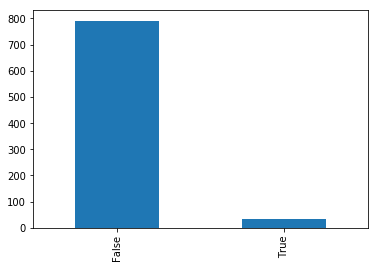

In [33]:
specs['todrop1'].value_counts().plot(kind='bar')

In [34]:
specs.to_csv(l)


## CMD outlier detection

In [35]:
specs = pd.read_csv(l)
specs = specs.rename(index=str, columns={'e_gmag':'eSDSS_g','e_rmag':'eSDSS_r',
                                         'e_imag':'eSDSS_i','e_zmag':'eSDSS_z',
                                         'e_ymag':'eSDSS_y','J Mag Err':'eJ',
                                         'H Mag Err':'eH','K Mag Err':'eK',
                                        })

In [36]:
specs[['spec_class','EPIC']]

,spec_class,EPIC
0,K3,210754915.0
1,M2,210762863.0
2,M3.5,210769047.0
3,M2,210770541.0
4,M2,210776021.0
5,F6,210779549.0
6,K6,210784223.0
7,M1.5,210784603.0
8,M3.5,210791550.0
9,M3.5,210803812.0


In [37]:

from f_6_7_8 import interactive_CMD

colors = [('g_r','SDSS_g','SDSS_r'),
          ('r_i','SDSS_r','SDSS_i'),
          #('i_z','SDSS_i','SDSS_z'),
          #('z_J','SDSS_z','J'),
          ('J_K','J','K'),
          #('H_K','H','K'),
          #('z-Y','SDSS_z','SDSS_y'),
          #('J-H','J','H'),
          #('H-K','H','K'),
         ]

for key, c0, c1 in colors:
    print(c0,c1)
    interactive_CMD(specs,cid1=c0,cid2=c1)
    input('Plot for {} done?'.format(key))

SDSS_g SDSS_r
[2.498019215298393, 1.2541929676090517, 0.523545604508337, 1.916037577919598, 0.4964876634922564, 0.840238061504, 0.4951767361255978, 1.4355835050598764, 1.1717508267545622, 1.6834488409215174, 0.5813776741499453, 1.3064838307457158, 2.4207643421035434, 4.124960605872498, 0.9501578816175762, 0.7200694410957876, 0.4904079934095692, 0.674166151627327, 0.7209022125087424, 1.8585209172887993, 0.7521303078589509, 2.3815961034566713, 0.3264965543462901, 2.409024698918631, 1.268108828137396, 2.293926764306132, 0.6952697318307478, 0.9213034245024818, 0.9626006440887104, 0.917877987534291, 0.8060397012554654, 1.6705687654209271, 0.8273451516749221, 1.055461984156701, 0.8276472678623424, 14.152642862730621, 0.9684007434941383, 8.997999777728381, 1.0248902380255165, 0.6931089380465382, 1.8660385848100782, 1.2303251602726817, 1.4063072210580447, 1.9416487838947598, 1.12769676775275, 0.7600657866263947, 1.0501904589168576, 0.38600518131237566, 0.6082762530298219, 0.8149233092751735, 0

Plot for g_r done?
SDSS_r SDSS_i
[3.0608005488760615, 0.37589892258425, 0.32015621187164245, 0.4870318264754368, 0.572712842531054, 0.40496913462633166, 0.8200609733428362, 0.6226556030423239, 0.47201694884823786, 0.412310562561766, 0.6360031446463138, 1.0183319694480772, 1.2433824833895641, 0.5458937625582472, 0.8183520025025907, 0.5714017850864661, 4.265219806762602, 0.29, 0.6529931086925802, 0.6670832032063168, 1.2060265337047937, 0.23259406699226012, 0.5536244214266564, 0.895377015563835, 0.543415126767741, 0.4569463863518345, 0.6217716622683925, 0.8443340571124678, 0.7824321056807422, 0.9234717104492156, 0.6809552114493287, 0.7683749084919418, 0.48104053883222775, 14.562187335699262, 0.7130918594402827, 12.062425129301321, 0.47634021455258213, 0.49244289008980524, 1.1765202930676546, 0.4301162633521313, 0.5980802621722271, 0.8910667763978187, 0.6780117993073572, 0.48020828814171884, 1.2258874336577563, 0.9774456506629922, 0.4753945729601885, 0.4716990566028301, 0.382099463490856, 

Plot for r_i done?
J K
[2.6907248094147422, 2.7202941017470885, 3.748332962798263, 2.9000000000000004, 3.1890437438203953, 2.9698484809835, 3.0610455730027937, 2.842534080710379, 3.623534186398688, 3.1144823004794873, 5.622277118748239, 3.1890437438203953, 3.67967389859482, 3.1144823004794873, 3.04138126514911, 3.606937759374287, 2.6248809496813377, 6.684309986827362, 3.3241540277189325, 2.920616373302047, 3.397057550292606, 2.842534080710379, 2.6907248094147422, 2.9000000000000004, 2.973213749463701, 3.1827660925679098, 5.4378304497290095, 2.9000000000000004, 2.9000000000000004, 3.471310991541956, 2.6907248094147422, 3.1144823004794873, 3.5383612025908264, 2.6907248094147422, 3.7013511046643495, 3.1112698372208087, 3.841874542459709, 5.280151512977635, 3.1890437438203953, 3.4828149534536, 3.394112549695428, 3.1240998703626617, 3.3241540277189325, 3.0000000000000004, 3.397057550292606, 3.3241540277189325, 3.2557641192199416, 3.3421549934136805, 3.3421549934136805, 4.177319714841085, 3.

Plot for J_K done?


In [38]:
outs=pd.DataFrame()
import os
from f_6_7_8 import CMD
for i in range(len(colors)):
    #/home/ekaterina/Documents/appaloosa/stars_shortlist/share/temp/
    file = 'selected-data{}.txt'.format(i)
    if os.stat(file).st_size != 0:
        df = pd.read_csv(file,header=None,sep=' ').T.dropna(how='any')
        df = df.rename(index=str, columns={0:'outlier'})
        df['color'] = colors[i][0]
      #  print(specs.EPIC[df.outlier.astype(int).values].values)
        df['EPIC'] = specs.EPIC[df.outlier.astype(int).values].values
        outs = pd.concat([outs,df],ignore_index=True)

outs = outs.sort_values(by='EPIC')

#specs['todrop'][specs.EPIC.isin(outs.EPIC.tolist())] = True 
td = specs.todrop1.values
whydrop2 = np.chararray(td.shape,itemsize=3,unicode=True)

whydrop2[specs.EPIC.isin(outs.EPIC.tolist()).values] = 'CMD'
whydrop2[~specs.EPIC.isin(outs.EPIC.tolist()).values] = '   '
specs['whydrop2'] = whydrop2
specs['todrop2'] = specs.EPIC.isin(outs.EPIC.tolist()).values

outs.to_csv('stars_shortlist/{0}/results/{1}/catalog/{0}_outliers.csv'.format(cluster,test))
outs = outs.drop_duplicates()

specs['todrop'] = specs.todrop1 | specs.todrop2
specs['whydrop'] = specs.whydrop2 + ' ' +specs.whydrop1.astype(str).apply(lambda x: x.replace('nan','')) 
specs = specs.drop(['todrop1','todrop2','whydrop1','whydrop2'],axis=1)
specs.whydrop[specs.todrop == True]

0           CMD 
1           CMD 
2           CMD 
3           CMD 
4           CMD 
5           CMD 
6           CMD 
7           CMD 
8           CMD 
9           CMD 
10          CMD 
11          CMD 
12          CMD 
13          CMD 
14          CMD 
15          CMD 
16          CMD 
17          CMD 
20          CMD 
21          CMD 
22          CMD 
23          CMD 
24          CMD 
26          CMD 
27          CMD 
28          CMD 
38          CMD 
39          CMD 
47          CMD 
162        noLum
         ...    
237        noLum
255        noLum
319        noLum
335        noLum
349        noLum
386        noLum
402        noLum
416        noLum
420        noLum
446        noLum
484        noLum
485        noLum
518        noLum
531        noLum
561        noLum
564        noLum
568        noLum
578        noLum
588        noLum
594        noLum
596        noLum
608        noLum
610        noLum
617        noLum
618        noLum
658        noLum
677        noLum
735        noL

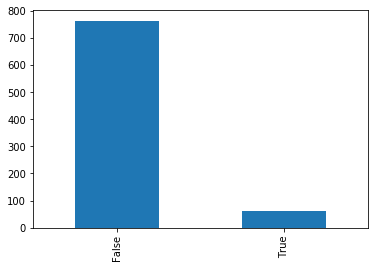

In [39]:
specs['todrop'].value_counts().plot(kind='bar')

## Other immediate exclusion criteria: too hot/cold, no data

In [40]:
specs.todrop[specs['T'] < 3000] = True
specs.todrop[specs['T'] > 6640] = True
specs.todrop[specs['T'] == np.nan] = True
specs.todrop[specs['L_quiet'] == np.nan] = True

specs.whydrop[specs['T'] < 3000] = 'T < 3000 K'
specs.whydrop[specs['T'] > 6640] = 'earlier than F4'
specs.whydrop[specs['T'] == np.nan] = 'no T'
specs.whydrop[specs['L_quiet'] == np.nan] = 'no L'

In [41]:
((specs.spectype_std > 10)).value_counts()

False    755
True      71
Name: spectype_std, dtype: int64

In [42]:
#intermediate save
specs.to_csv(l)

In [43]:
specs[specs.todrop!=False]

,EPIC,Unnamed: 0,Unnamed: 0.1,angDist,col1,Name,RAJ2000,DEJ2000,OName,Vmag,...,Mbol_err,spectype_std,L_quiet_logL,L_quiet,L_planck,L_quiet_bol,L_quiet_err,L_quiet_bol_err,todrop,whydrop
0,210754915.0,59,0,0.826592,192.0,034428.08+191106.1,56.11701,19.18504,DH343,11.84,...,0.140,2.341874,1.052107e+33,6.141090e+31,9.993294e+32,1.081583e+33,2.520371e+31,3.486613e+32,True,CMD
1,210762863.0,70,1,0.769552,166.0,034411.90+191819.4,56.04961,19.30539,DH318,15.10,...,0.125,4.943430,1.076614e+32,3.879502e+30,1.033609e+32,1.091591e+32,1.290365e+30,3.141852e+31,True,CMD
2,210769047.0,73,2,0.728269,702.0,035623.92+192353.7,59.09967,19.39828,UGCSJ035623.92+192353.3,NaN,...,0.375,4.106017,3.404552e+31,9.817375e+29,3.264239e+31,3.388910e+31,4.149078e+29,2.926220e+31,True,CMD
3,210770541.0,70,3,0.867280,811.0,035324.07+192516.8,58.35033,19.42136,s4543478,NaN,...,0.125,4.580871,1.076614e+32,3.879502e+30,1.033609e+32,1.091591e+32,1.290365e+30,3.141852e+31,True,CMD
4,210776021.0,70,4,0.816603,683.0,035513.62+193016.9,58.80676,19.50472,DH813,16.74,...,0.125,9.867085,1.076614e+32,3.879502e+30,1.033609e+32,1.091591e+32,1.290365e+30,3.141852e+31,True,CMD
5,210779549.0,42,5,0.028077,219.0,034501.66+193333.7,56.25695,19.55937,PELS135,9.45,...,0.145,6.144103,1.076614e+34,7.110132e+32,1.032525e+34,1.091591e+34,2.019161e+32,3.644548e+33,True,CMD
6,210784223.0,62,6,1.062146,684.0,035515.73+193746.6,58.81555,19.62963,s4745026,NaN,...,0.155,6.595453,5.035702e+32,2.531261e+31,4.833135e+32,5.035702e+32,1.053138e+31,1.797245e+32,True,CMD
7,210784603.0,69,7,0.815150,759.0,033103.57+193805.1,52.76490,19.63475,s3289407,NaN,...,0.175,6.411659,1.355377e+32,5.192362e+30,1.297629e+32,1.374232e+32,1.694113e+30,5.537500e+31,True,CMD
8,210791550.0,73,8,0.765664,726.0,035916.63+194427.5,59.81933,19.74099,UGCSJ035916.64+194427.1,NaN,...,0.375,3.354102,3.404552e+31,9.817375e+29,3.264239e+31,3.388910e+31,4.149078e+29,2.926220e+31,True,CMD
9,210803812.0,73,9,0.817008,26.0,033910.20+195531.0,54.79251,19.92528,UGCSJ033910.21+195530.5,NaN,...,0.375,2.904738,3.404552e+31,9.817375e+29,3.264239e+31,3.388910e+31,4.149078e+29,2.926220e+31,True,CMD


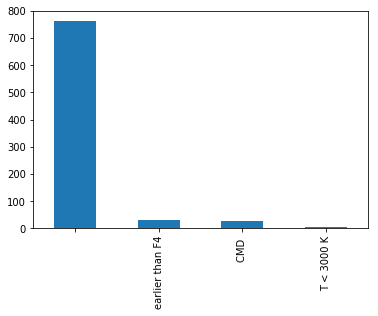

In [44]:
specs.whydrop.value_counts().plot(kind='bar')

## CMD plots

In [ ]:
from pandas.api.types import CategoricalDtype
from f_6_7_8 import spec_class_hist
categor = ['{}{}'.format(c,num) for c in list('OBAFGKM') for num in list(range(10))]
type_ = CategoricalDtype(categories=categor, ordered=True)
specs.spec_class.astype(type_)
s = specs.sort_values(by='spec_class')
spec_class_hist(s,cluster,type_)

In [ ]:
from f_6_7_8 import CMD
outliers = outs.EPIC.drop_duplicates().tolist()
for key, c0, c1 in colors:
    CMD(specs,cluster,cid1=c0,cid2=c1,colour=key, ylim=(18,9),outliers=outliers)#,colour=key

In [ ]:
CMD(specs,cluster,cid1='gmag',cid2='imag',color='g_i',ylim=(21,8))#19,5
CMD(specs,cluster,cid1='J',cid2='K',color='J_K',ylim=(18,6))#14,5
CMD(specs,cluster,cid1='rmag',cid2='zmag',color='r_z',ylim=(20,8))#18,5
CMD(specs,cluster,cid1='gmag',cid2='zmag',color='g_z',ylim=(20,9))#18,5